## _*H2 ground state energy with VQE and SPSA*_

This notebook demonstrates using Qiskit Chemistry to plot graphs of the ground state energy of the Hydrogen (H2) molecule over a range of inter-atomic distances using VQE with SPSA optimizer. It is compared to the same energies as computed by the ExactEigensolver. SPSA is designed to work well with probabalistic/noisy measurements. And with RYRZ variational form makes this a suitable configuration to run on a near term device.

This notebook populates a dictionary, that is a progammatic representation of an input file, in order to drive the qiskit_chemistry stack. Such a dictionary can be manipulated programmatically and this is indeed the case here where we alter the molecule supplied to the driver in each loop.

This notebook has been written to use the PYSCF chemistry driver. See the PYSCF chemistry driver readme if you need to install the external PySCF library that this driver requires.

In [1]:
import numpy as np
import pylab
from qiskit_chemistry import QiskitChemistry

# Input dictionary to configure Qiskit Chemistry for the chemistry problem.
qiskit_chemistry_dict = {
    'driver': {'name': 'PYSCF'},
    'PYSCF': {'atom': '', 'basis': 'sto3g'},
    'operator': {'name': 'hamiltonian', 'transformation': 'full', 
                 'qubit_mapping': 'parity', 'two_qubit_reduction': True},
    'algorithm': {'name': 'VQE'},
    'optimizer': {'name': 'SPSA', 'max_trials': 350},
    'variational_form': {'name': 'RYRZ', 'depth': 3, 'entanglement': 'full'}
}
molecule = 'H .0 .0 -{0}; H .0 .0 {0}'
algorithms = ['VQE', 'ExactEigensolver']
backends = [{'name': 'qasm_simulator', 'shots': 1024},
             None
           ]

start = 0.5  # Start distance
by    = 0.5  # How much to increase distance by
steps = 20   # Number of steps to increase by
energies = np.empty([len(algorithms), steps+1])
hf_energies = np.empty(steps+1)
distances = np.empty(steps+1)

print('Processing step __', end='')
for i in range(steps+1):
    print('\b\b{:2d}'.format(i), end='', flush=True)
    d = start + i*by/steps
    qiskit_chemistry_dict['PYSCF']['atom'] = molecule.format(d/2) 
    for j in range(len(algorithms)):
        qiskit_chemistry_dict['algorithm']['name'] = algorithms[j]
        if backends[j] is not None:
            qiskit_chemistry_dict['backend'] = backends[j]
        else:
            qiskit_chemistry_dict.pop('backend')
        solver = QiskitChemistry()
        result = solver.run(qiskit_chemistry_dict)
        energies[j][i] = result['energy']
        hf_energies[i] = result['hf_energy']
    distances[i] = d
print(' --- complete')

print('Distances: ', distances)
print('Energies:', energies)
print('Hartree-Fock energies:', hf_energies)

Processing step 20 --- complete
Distances:  [0.5   0.525 0.55  0.575 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775
 0.8   0.825 0.85  0.875 0.9   0.925 0.95  0.975 1.   ]
Energies: [[-1.04791876 -1.07420635 -1.08779346 -1.10880279 -1.11899652 -1.12671817
  -1.13457894 -1.13277581 -1.1344774  -1.1347043  -1.13293985 -1.14356835
  -1.14347015 -1.12904676 -1.14013816 -1.12672765 -1.12100335 -1.1174054
  -1.1043725  -1.10428366 -1.09728721]
 [-1.05515979 -1.07591366 -1.09262991 -1.10591805 -1.11628601 -1.12416092
  -1.12990478 -1.13382622 -1.13618945 -1.13722138 -1.13711707 -1.13604436
  -1.13414767 -1.13155121 -1.12836188 -1.12467175 -1.12056028 -1.11609624
  -1.11133942 -1.10634211 -1.10115033]]
Hartree-Fock energies: [-1.04299627 -1.06306214 -1.07905074 -1.0915705  -1.10112824 -1.10814999
 -1.11299655 -1.11597526 -1.11734903 -1.11734327 -1.11615145 -1.11393966
 -1.1108504  -1.10700581 -1.10251055 -1.09745432 -1.09191404 -1.08595587
 -1.07963693 -1.07300676 -1.06610865]


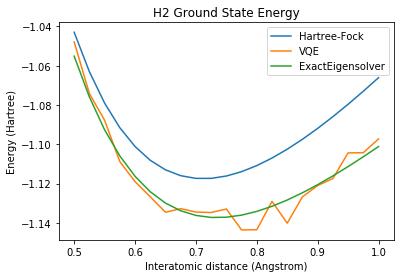

In [2]:
pylab.plot(distances, hf_energies, label='Hartree-Fock')
for j in range(len(algorithms)):
    pylab.plot(distances, energies[j], label=algorithms[j])
pylab.xlabel('Interatomic distance (Angstrom)')
pylab.ylabel('Energy (Hartree)')
pylab.title('H2 Ground State Energy')
pylab.legend(loc='upper right')

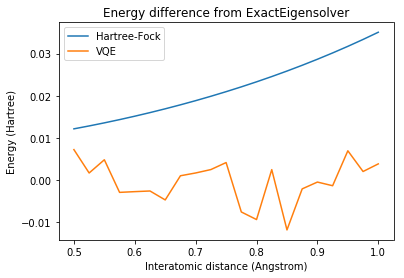

In [3]:
pylab.plot(distances, np.subtract(hf_energies, energies[1]), label='Hartree-Fock')
pylab.plot(distances, np.subtract(energies[0], energies[1]), label=algorithms[0])
pylab.xlabel('Interatomic distance (Angstrom)')
pylab.ylabel('Energy (Hartree)')
pylab.title('Energy difference from ExactEigensolver')
pylab.legend(loc='upper left')